<ipython-input-2-1e97a10244ea>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wavelengths, y=correlations, palette='viridis')


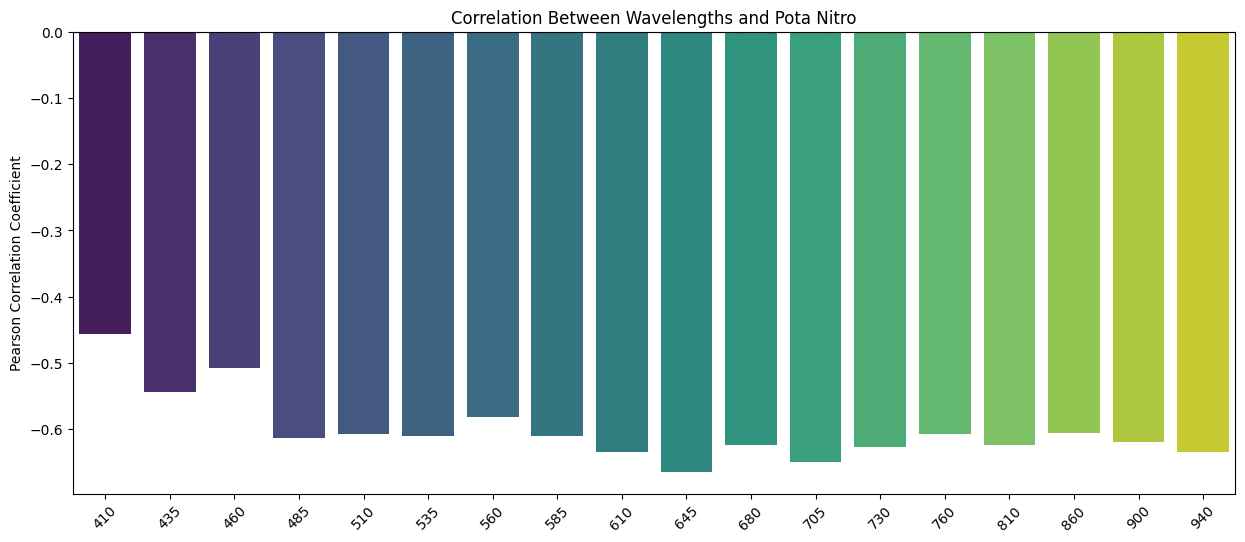

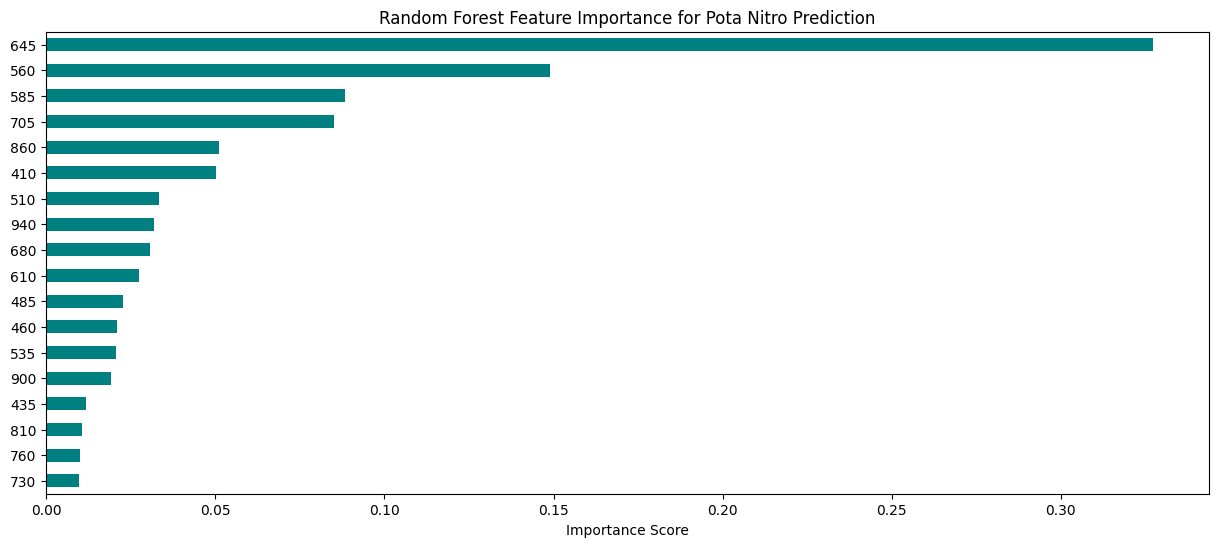

<ipython-input-2-1e97a10244ea>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby('Pota_Nitro_group'):


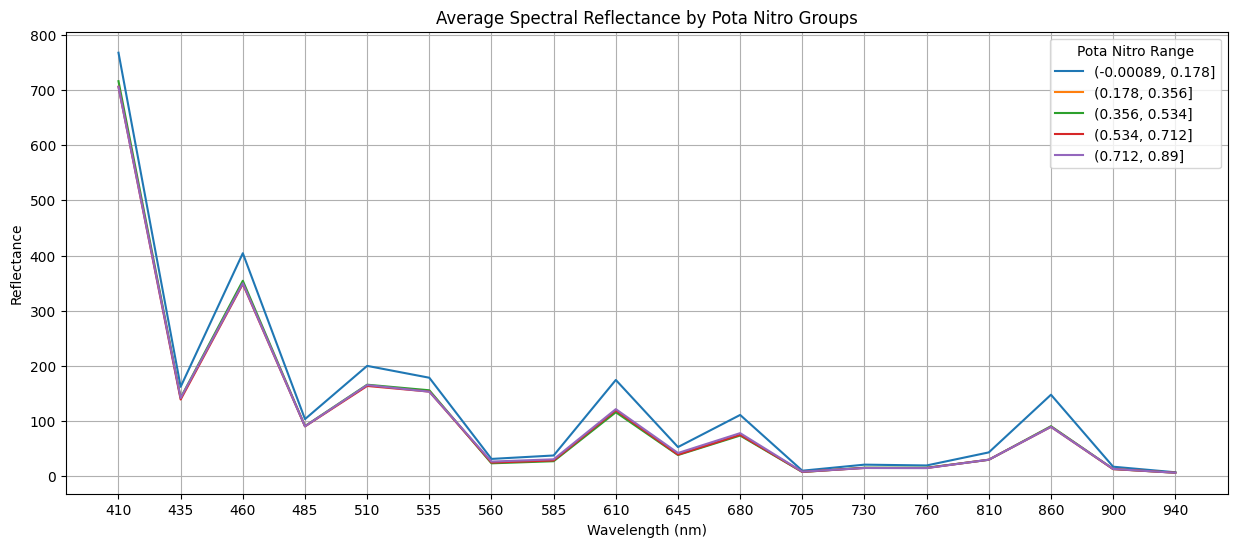

NameError: name 'np' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# 1. Load your dataset
df = pd.read_csv('/content/merged_soildataset_updated.csv')  # Update path to your file

# Define wavelengths (ensure these match your column names)
wavelengths = ['410', '435', '460', '485', '510', '535', '560', '585', '610',
               '645', '680', '705', '730', '760', '810', '860', '900', '940']

# 2. Correlation Analysis - Plot wavelength vs Pota Nitro correlation
plt.figure(figsize=(15, 6))
correlations = df[wavelengths].corrwith(df['Pota Nitro (mg/10 g)'])
sns.barplot(x=wavelengths, y=correlations, palette='viridis')
plt.axhline(0, color='k', linestyle='--')
plt.title('Correlation Between Wavelengths and Pota Nitro')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

# 3. Feature Importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df[wavelengths], df['Pota Nitro (mg/10 g)'])

plt.figure(figsize=(15, 6))
importances = pd.Series(rf.feature_importances_, index=wavelengths).sort_values()
importances.plot(kind='barh', color='teal')
plt.title('Random Forest Feature Importance for Pota Nitro Prediction')
plt.xlabel('Importance Score')
plt.show()

# 4. Spectral Reflectance Plot by Pota Nitro Groups
df['Pota_Nitro_group'] = pd.cut(df['Pota Nitro (mg/10 g)'], bins=5)  # Create 5 Pota Nitro groups
plt.figure(figsize=(15, 6))
for name, group in df.groupby('Pota_Nitro_group'):
    plt.plot(wavelengths, group[wavelengths].mean(), label=name)
plt.title('Average Spectral Reflectance by Pota Nitro Groups')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.legend(title='Pota Nitro Range')
plt.grid(True)
plt.show()

# 5. Permutation Importance (more reliable)
result = permutation_importance(rf, df[wavelengths], df['Pota Nitro (mg/10 g)'], n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(15, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(wavelengths)[sorted_idx])
plt.title("Permutation Importance of Wavelengths for Pota Nitro Prediction")
plt.xlabel("Decrease in Model Score")
plt.show()

# 6. Identify Key Wavelengths
key_wavelengths = correlations.abs().sort_values(ascending=False).head(5).index.tolist()
print(f"\nTop 5 most important wavelengths for Pota Nitro prediction: {key_wavelengths}")
print("Interpretation Guide:")
print("- Wavelengths with highest absolute correlation matter most")
print("- Random Forest importance shows non-linear relationships")
print("- Spectral plots show where Pota Nitro groups differ most")
print("- Permutation importance is the most reliable metric")

# Bonus: Save the important wavelengths to a file
pd.Series(key_wavelengths).to_csv('important_wavelengths_for_pota_nitro.csv', index=False)

Training Enhanced 3-Wavelength Transformer for Pota Nitro...
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - loss: 0.5270 - mae: 0.4604 - mse: 0.3921 - val_loss: 0.4383 - val_mae: 0.2979 - val_mse: 0.2149 - learning_rate: 1.0000e-04
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5002 - mae: 0.4340 - mse: 0.3389 - val_loss: 0.4272 - val_mae: 0.2870 - val_mse: 0.1937 - learning_rate: 1.0000e-04
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4959 - mae: 0.4292 - mse: 0.3311 - val_loss: 0.4160 - val_mae: 0.2746 - val_mse: 0.1721 - learning_rate: 1.0000e-04
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4728 - mae: 0.3974 - mse: 0.2860 - val_loss: 0.4035 - val_mae: 0.2603 - val_mse: 0.1477 - learning_rate: 1.0000e-04
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4570 - mae: 0.3810 - mse: 0.2549 - val_loss: 0.3912 - val_mae: 0.2451 - val_mse: 0.1240 - learning_rate: 1.0000e-04
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss:

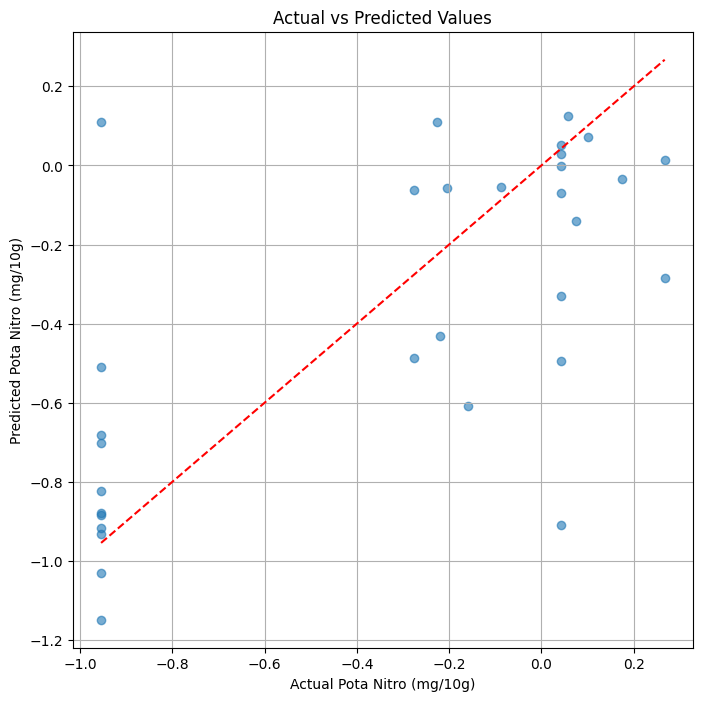

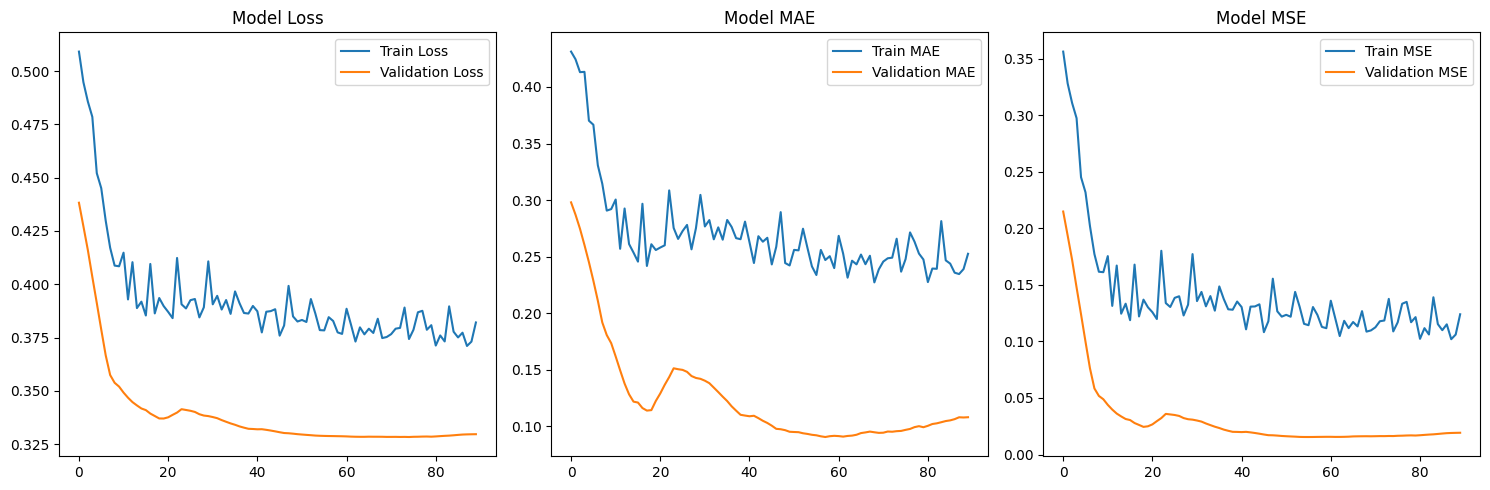


Wavelength Statistics:
              410         460         510
count  155.000000  155.000000  155.000000
mean   731.159635  369.904045  176.971365
std     55.800374   45.774950   25.953469
min    650.295000  308.229000  141.525000
25%    688.037500  335.482500  157.742500
50%    718.466000  359.013000  169.320000
75%    761.632500  392.613500  189.850000
max    902.816000  557.336000  258.177000


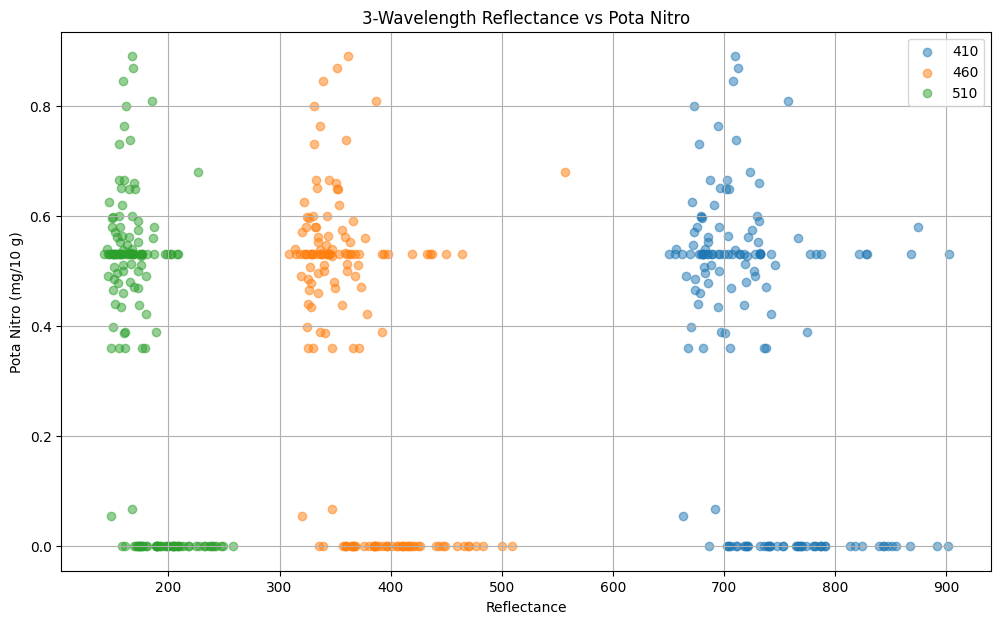


Sample Predictions:
True Pota Nitro: -0.95 | Predicted: -1.15 | Error: 0.19
True Pota Nitro: -0.21 | Predicted: -0.06 | Error: 0.15
True Pota Nitro: -0.16 | Predicted: -0.61 | Error: 0.45
True Pota Nitro: -0.95 | Predicted: -0.68 | Error: 0.27
True Pota Nitro: -0.95 | Predicted: -0.88 | Error: 0.08


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.layers import (Dense, Input, MultiHeadAttention,
                                    LayerNormalization, Multiply, Add,
                                    Concatenate, Dropout, BatchNormalization)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Data Loading and Preprocessing
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath).copy()
    wavelengths = ['410', '460', '510']  # Only these three wavelengths

    def extract_water_level(record_group):
        if '_' in record_group:
            parts = record_group.split('_')
        elif '-' in record_group and 'ml' in record_group:
            parts = record_group.split('-')
        else:
            return np.nan

        for part in parts:
            if 'ml' in part:
                return part
        return np.nan

    data['water_level'] = data['Records'].apply(extract_water_level)
    data = data.dropna(subset=['water_level'])
    data['water_level'] = data['water_level'].str.extract(r'(\d+ml)')[0]

    def create_features(X_df):
        X = X_df.copy()
        # Enhanced feature engineering
        X['410_460_ratio'] = X['410'] / (X['460'] + 1e-9)
        X['460_510_ratio'] = X['460'] / (X['510'] + 1e-9)
        X['410_510_ratio'] = X['410'] / (X['510'] + 1e-9)
        X['triple_index'] = (X['410'] * X['460']) / (X['510'] + 1e-9)
        X['spectral_sum'] = X['410'] + X['460'] + X['510']
        X['spectral_balance'] = (X['510'] - X['410']) / (X['460'] + 1e-9)
        X['normalized_410'] = X['410'] / X['spectral_sum']
        X['normalized_460'] = X['460'] / X['spectral_sum']
        X['normalized_510'] = X['510'] / X['spectral_sum']
        X['410_squared'] = X['410'] ** 2
        X['460_squared'] = X['460'] ** 2
        X['510_squared'] = X['510'] ** 2
        X['log_410'] = np.log1p(X['410'])
        X['log_460'] = np.log1p(X['460'])
        X['log_510'] = np.log1p(X['510'])
        return X.values

    X = create_features(data[wavelengths])
    y = data['Pota Nitro (mg/10 g)'].values

    # Scale features using RobustScaler (less sensitive to outliers)
    preprocessor = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    X = preprocessor.fit_transform(X)

    # Scale target if needed
    y_scaler = RobustScaler()
    y = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

    return X, y, preprocessor, data, wavelengths, y_scaler

# Load data
X, y, preprocessor, data, wavelengths, y_scaler = load_and_preprocess_data('merged_soildataset_updated.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Enhanced Multi-Wavelength Transformer
def build_multi_wavelength_transformer(input_shape):
    inputs = Input(shape=(input_shape,))

    # Initial feature projection with regularization
    x = Dense(256, activation='swish', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Multi-wavelength attention with residual connections
    for _ in range(2):  # Stack two attention layers
        attn_output = MultiHeadAttention(
            num_heads=4,  # Increased heads for better attention
            key_dim=64,
            attention_axes=1
        )(x, x)
        x = LayerNormalization()(x + attn_output)
        x = Dense(128, activation='swish', kernel_regularizer=l2(0.001))(x)
        x = Dropout(0.2)(x)

    # Enhanced spectral branches with skip connections
    def create_branch(input_tensor, units=64):
        branch = Dense(units, activation='swish')(input_tensor)
        branch = BatchNormalization()(branch)
        branch = Dense(units//2, activation='swish')(branch)
        return branch

    branch_410 = create_branch(x, 64)
    branch_460 = create_branch(x, 64)
    branch_510 = create_branch(x, 64)

    # Dynamic wavelength weighting
    weights = Dense(3, activation='softmax')(x)
    weighted_410 = Multiply()([weights[:, 0:1], branch_410])
    weighted_460 = Multiply()([weights[:, 1:2], branch_460])
    weighted_510 = Multiply()([weights[:, 2:3], branch_510])

    # Combine with additional processing
    combined = Concatenate()([weighted_410, weighted_460, weighted_510])
    combined = Dense(128, activation='swish')(combined)
    combined = Dropout(0.2)(combined)

    # Final output with multiple dense layers
    x = Dense(64, activation='swish')(combined)
    x = Dense(32, activation='swish')(x)

    outputs = Dense(1, activation='linear')(x)  # Linear activation for regression

    model = Model(inputs, outputs)

    # Initialize optimizer with base learning rate
    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='huber',  # Huber loss is robust to outliers
        metrics=['mae', 'mse']
    )
    return model

# Initialize model
transformer = build_multi_wavelength_transformer(X_train.shape[1])

# Enhanced callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1)

print(f"Training Enhanced 3-Wavelength Transformer for Pota Nitro...")
history = transformer.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,  # Increased epochs
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluation
y_pred = transformer.predict(X_test, verbose=0).flatten()
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nEnhanced Model Performance Metrics:")
print(f"MAE: {mae:.4f} mg/10g")
print(f"RMSE: {rmse:.4f} mg/10g")
print(f"R² Score: {r2:.4f}")
print(f"\nAverage Pota Nitro: {y.mean():.2f} mg/10g")
print(f"MAE as % of mean: {(mae/y.mean())*100:.1f}%")

# Feature importance analysis (permutation importance)
def r2_scorer(estimator, X, y):
    return r2_score(y, estimator.predict(X))

result = permutation_importance(
    transformer, X_test, y_test,
    n_repeats=10,
    scoring=r2_scorer,
    random_state=42
)

print("\nFeature Importance (based on R² decrease):")
feature_names = wavelengths + [
    '410_460_ratio', '460_510_ratio', '410_510_ratio',
    'triple_index', 'spectral_sum', 'spectral_balance',
    'normalized_410', 'normalized_460', 'normalized_510',
    '410_squared', '460_squared', '510_squared',
    'log_410', 'log_460', 'log_510'
]

for i in result.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<20}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Pota Nitro (mg/10g)')
plt.ylabel('Predicted Pota Nitro (mg/10g)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Plot training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE')
plt.legend()

plt.tight_layout()
plt.show()

# Wavelength statistics and visualization
print("\nWavelength Statistics:")
print(data[wavelengths].describe())

plt.figure(figsize=(12, 7))
for wl in wavelengths:
    plt.scatter(data[wl], data['Pota Nitro (mg/10 g)'], alpha=0.5, label=wl)
plt.xlabel('Reflectance')
plt.ylabel('Pota Nitro (mg/10 g)')
plt.title('3-Wavelength Reflectance vs Pota Nitro')
plt.legend()
plt.grid(True)
plt.show()

# Sample predictions
sample_idx = np.random.choice(len(X_test), 5)
print("\nSample Predictions:")
for idx in sample_idx:
    sample = X_test[idx:idx+1]
    pred = transformer.predict(sample, verbose=0)[0][0]
    print(f"True Pota Nitro: {y_test[idx]:.2f} | Predicted: {pred:.2f} | Error: {abs(y_test[idx]-pred):.2f}")

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.layers import (Dense, Input, MultiHeadAttention,
                                    LayerNormalization, Multiply, Add,
                                    Concatenate, Dropout, BatchNormalization)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Data Loading and Preprocessing
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath).copy()
    wavelengths = ['410', '460', '510']

    def extract_water_level(record_group):
        if '_' in record_group:
            parts = record_group.split('_')
        elif '-' in record_group and 'ml' in record_group:
            parts = record_group.split('-')
        else:
            return np.nan

        for part in parts:
            if 'ml' in part:
                return part.replace('ml', '') + 'ml'  # Standardize format
        return np.nan

    data['water_level'] = data['Records'].apply(extract_water_level)
    data = data.dropna(subset=['water_level'])

    def create_features(X_df):
        X = X_df.copy()
        X['410_460_ratio'] = X['410'] / (X['460'] + 1e-9)
        X['460_510_ratio'] = X['460'] / (X['510'] + 1e-9)
        X['410_510_ratio'] = X['410'] / (X['510'] + 1e-9)
        X['triple_index'] = (X['410'] * X['460']) / (X['510'] + 1e-9)
        X['spectral_sum'] = X['410'] + X['460'] + X['510']
        X['spectral_balance'] = (X['510'] - X['410']) / (X['460'] + 1e-9)
        X['normalized_410'] = X['410'] / X['spectral_sum']
        X['normalized_460'] = X['460'] / X['spectral_sum']
        X['normalized_510'] = X['510'] / X['spectral_sum']
        X['410_squared'] = X['410'] ** 2
        X['460_squared'] = X['460'] ** 2
        X['510_squared'] = X['510'] ** 2
        X['log_410'] = np.log1p(X['410'])
        X['log_460'] = np.log1p(X['460'])
        X['log_510'] = np.log1p(X['510'])
        return X.values

    X = create_features(data[wavelengths])
    y = data['Pota Nitro (mg/10 g)'].values

    preprocessor = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    X = preprocessor.fit_transform(X)

    y_scaler = RobustScaler()
    y = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Split while keeping water_level information
    train_idx, test_idx = train_test_split(np.arange(len(X)), test_size=0.2, random_state=42)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    data_train, data_test = data.iloc[train_idx], data.iloc[test_idx]

    return X_train, X_test, y_train, y_test, preprocessor, data_train, data_test, wavelengths, y_scaler

# Load data
X_train, X_test, y_train, y_test, preprocessor, data_train, data_test, wavelengths, y_scaler = load_and_preprocess_data('merged_soildataset_updated.csv')

# Model Building
def build_multi_wavelength_transformer(input_shape):
    inputs = Input(shape=(input_shape,))

    x = Dense(256, activation='swish', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    for _ in range(2):
        attn_output = MultiHeadAttention(
            num_heads=4,
            key_dim=64,
            attention_axes=1
        )(x, x)
        x = LayerNormalization()(x + attn_output)
        x = Dense(128, activation='swish', kernel_regularizer=l2(0.001))(x)
        x = Dropout(0.2)(x)

    def create_branch(input_tensor, units=64):
        branch = Dense(units, activation='swish')(input_tensor)
        branch = BatchNormalization()(branch)
        branch = Dense(units//2, activation='swish')(branch)
        return branch

    branch_410 = create_branch(x, 64)
    branch_460 = create_branch(x, 64)
    branch_510 = create_branch(x, 64)

    weights = Dense(3, activation='softmax')(x)
    weighted_410 = Multiply()([weights[:, 0:1], branch_410])
    weighted_460 = Multiply()([weights[:, 1:2], branch_460])
    weighted_510 = Multiply()([weights[:, 2:3], branch_510])

    combined = Concatenate()([weighted_410, weighted_460, weighted_510])
    combined = Dense(128, activation='swish')(combined)
    combined = Dropout(0.2)(combined)

    x = Dense(64, activation='swish')(combined)
    x = Dense(32, activation='swish')(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='huber', metrics=['mae', 'mse'])
    return model

# Initialize and train model
transformer = build_multi_wavelength_transformer(X_train.shape[1])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

print("Training model...")
history = transformer.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluation functions
def evaluate_by_water_level(model, X_test, y_test, data_test):
    results = {}
    water_levels = sorted(data_test['water_level'].unique())

    for level in water_levels:
        mask = data_test['water_level'] == level
        X_level = X_test[mask]
        y_level = y_test[mask]

        if len(X_level) > 0:
            y_pred = model.predict(X_level, verbose=0).flatten()
            results[level] = {
                'r2': r2_score(y_level, y_pred),
                'mae': mean_absolute_error(y_level, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_level, y_pred)),
                'samples': len(X_level)
            }

    return results

# Overall evaluation
y_pred = transformer.predict(X_test, verbose=0).flatten()
print("\nOverall Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Water level specific evaluation
water_level_results = evaluate_by_water_level(transformer, X_test, y_test, data_test)

print("\nPerformance by Water Level:")
for level, metrics in water_level_results.items():
    print(f"\nWater Level: {level}")
    print(f"Samples: {metrics['samples']}")
    print(f"R² Score: {metrics['r2']:.4f}")
    print(f"MAE: {metrics['mae']:.4f}")
    print(f"RMSE: {metrics['rmse']:.4f}")

# Visualization
plt.figure(figsize=(15, 5))

# R² by water level
plt.subplot(1, 3, 1)
levels = list(water_level_results.keys())
r2_scores = [metrics['r2'] for metrics in water_level_results.values()]
plt.bar(levels, r2_scores)
plt.title('R² by Water Level')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v+0.05, f"{v:.2f}", ha='center')

# Training history
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.legend()

# Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

Training model...
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 253ms/step - loss: 0.5208 - mae: 0.4437 - mse: 0.3750 - val_loss: 0.4468 - val_mae: 0.3055 - val_mse: 0.2278 - learning_rate: 1.0000e-04
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5048 - mae: 0.4300 - mse: 0.3441 - val_loss: 0.4411 - val_mae: 0.2995 - val_mse: 0.2175 - learning_rate: 1.0000e-04
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4862 - mae: 0.3987 - mse: 0.3079 - val_loss: 0.4356 - val_mae: 0.2949 - val_mse: 0.2075 - learning_rate: 1.0000e-04
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4858 - mae: 0.4097 - mse: 0.3081 - val_loss: 0.4302 - val_mae: 0.2901 - val_mse: 0.1977 - learning_rate: 1.0000e-04
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4815 - mae: 0.4068 - mse: 0.3005 - val_loss: 0.4243 - val_mae: 0.2847 - val_mse: 0.1867 - learning_rate: 1.0000e-04
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4785 - mae: 0.4141 - mse: 0.2952 - val_l

<ipython-input-22-a1d54e9b78c7>:206: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
from sklearn.model_selection import GroupKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import spearmanr

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    # Extract water level
    def get_water_level(record):
        if pd.isna(record): return np.nan
        s = str(record)
        for sep in ['_', '-']:
            if sep in s:
                for part in s.split(sep):
                    if 'ml' in part:
                        return part
        return np.nan

    df['water_level'] = df['Records'].apply(get_water_level)
    df = df.dropna(subset=['water_level'])
    df['water_level'] = df['water_level'].str.extract(r'(\d+ml)')[0]
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)

    # Focus on our 3 target wavelengths
    wavelengths = ['410', '460', '510']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])

    # Create spectral indices using our target wavelengths
    df['NDI_410_460'] = (df['460'] - df['410']) / (df['460'] + df['410'] + 1e-9)
    df['NDI_460_510'] = (df['510'] - df['460']) / (df['510'] + df['460'] + 1e-9)
    df['Triple_Index'] = (df['410'] * df['460']) / (df['510'] + 1e-9)
    df['Modified_Triple'] = (df['410'] + df['460']) / (df['510'] + 1e-9)

    # Use the correct target variable
    target_var = 'Pota Nitro (mg/10 g)'
    return df.dropna(subset=[target_var])

def select_best_features(X, y):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    importance = np.abs(shap_values.values).mean(axis=0)
    feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
    return feature_importance.index[:8].tolist()  # Increased to 8 features

def optimize_model(X, y):
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 0.5, 0.8]
    }
    model = RandomForestRegressor(random_state=42)
    search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
    search.fit(X, y)
    return search.best_estimator_

def augment_data(X, y):
    # SMOTE for regression (requires proper implementation)
    # For simplicity, we'll use random oversampling here
    from sklearn.utils import resample
    X_resampled = pd.concat([X] * 2)  # Simple duplication
    y_resampled = pd.concat([y] * 2)
    return X_resampled, y_resampled

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'r2': r2_score(y, y_pred),
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'spearman': spearmanr(y, y_pred)[0]
    }

def main():
    df = load_and_preprocess('/content/merged_soildataset_updated.csv')
    results = {}
    target_var = 'Pota Nitro (mg/10 g)'

    # Define our priority order (25ml first)
    for level in ['25ml', '50ml', '0ml', '75ml']:
        level_data = df[df['water_level'] == level]
        if len(level_data) < 5:
            print(f"Not enough samples for {level} (only {len(level_data)} available)")
            continue

        # Prepare features - include both raw and transformed wavelengths
        X = level_data[[
            '410', '460', '510',
            'log_410', 'log_460', 'log_510',
            'NDI_410_460', 'NDI_460_510',
            'Triple_Index', 'Modified_Triple',
            'water_level_numeric'
        ]]
        y = level_data[target_var]

        # Feature selection
        best_features = select_best_features(X, y)
        X = X[best_features]
        print(f"\nSelected features for {level}: {best_features}")

        # Data augmentation if needed (especially for 25ml)
        if len(X) < 30 and level == '25ml':
            X, y = augment_data(X, y)

        # Model optimization with cross-validation
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = optimize_model(X_train, y_train)

        # Evaluation
        train_metrics = evaluate_model(model, X_train, y_train)
        test_metrics = evaluate_model(model, X_test, y_test)

        results[level] = {
            'model': model,
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'features': best_features
        }

        print(f"\n=== Results for {level} ===")
        print(f"Train R²: {train_metrics['r2']:.3f}")
        print(f"Test R²: {test_metrics['r2']:.3f}")
        print(f"Test RMSE: {test_metrics['rmse']:.3f}")
        print(f"Test Spearman ρ: {test_metrics['spearman']:.3f}")

        # Save model
        joblib.dump(model, f'best_model_{level}.pkl')

        # Feature importance plot
        plt.figure(figsize=(10, 6))
        importances = pd.Series(model.feature_importances_, index=best_features).sort_values()
        importances.plot(kind='barh')
        plt.title(f'Feature Importance - {level}')
        plt.tight_layout()
        plt.savefig(f'feature_importance_{level}.png')
        plt.close()

    return results

if __name__ == "__main__":
    results = main()


Selected features for 25ml: ['Triple_Index', 'NDI_410_460', 'NDI_460_510', 'log_460', 'log_410', '410', 'Modified_Triple', '510']


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_


=== Results for 25ml ===
Train R²: 0.414
Test R²: 0.054
Test RMSE: 0.054
Test Spearman ρ: 0.532

Selected features for 50ml: ['Modified_Triple', 'NDI_460_510', 'Triple_Index', 'NDI_410_460', 'log_410', '410', 'log_460', 'log_510']


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/


=== Results for 50ml ===
Train R²: 0.299
Test R²: -0.054
Test RMSE: 0.218
Test Spearman ρ: 0.288

Selected features for 0ml: ['NDI_460_510', '510', 'NDI_410_460', 'Modified_Triple', '460', 'Triple_Index', '410', 'log_460']


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/


=== Results for 0ml ===
Train R²: 0.861
Test R²: 0.012
Test RMSE: 0.185
Test Spearman ρ: 0.509
Not enough samples for 75ml (only 1 available)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    def get_water_level(record):
        if pd.isna(record): return np.nan
        s = str(record)
        for sep in ['_', '-']:
            if sep in s:
                for part in s.split(sep):
                    if 'ml' in part:
                        return part
        return np.nan

    df['water_level'] = df['Records'].apply(get_water_level)
    df = df.dropna(subset=['water_level'])
    df['water_level'] = df['water_level'].str.extract(r'(\d+ml)')[0]
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)

    wavelengths = ['410', '460', '510']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        df[f'sqrt_{wl}'] = np.sqrt(df[wl])
        df[f'sq_{wl}'] = df[wl] ** 2

    df['NDI_410_460'] = (df['460'] - df['410']) / (df['460'] + df['410'] + 1e-9)
    df['NDI_460_510'] = (df['510'] - df['460']) / (df['510'] + df['460'] + 1e-9)
    df['Triple_Index'] = (df['410'] * df['460']) / (df['510'] + 1e-9)
    df['Modified_Triple'] = (df['410'] + df['460']) / (df['510'] + 1e-9)
    df['Ratio_410_510'] = df['410'] / (df['510'] + 1e-9)
    df['Sum_410_460'] = df['410'] + df['460']
    df['Diff_460_410'] = df['460'] - df['410']
    df['410_460_interact'] = df['410'] * df['460']
    df['460_510_interact'] = df['460'] * df['510']

    target_var = 'Pota Nitro (mg/10 g)'
    return df.dropna(subset=[target_var])

def train_specialized_model(X, y):
    numeric_transformer = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False)
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, X.columns.tolist())
        ])

    model = make_pipeline(
        preprocessor,
        GradientBoostingRegressor(
            n_estimators=150,
            learning_rate=0.05,
            max_depth=4,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )
    )

    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'r2': r2_score(y, y_pred),
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'spearman': spearmanr(y, y_pred)[0]
    }

def main():
    df = load_and_preprocess('/content/merged_soildataset_updated.csv')
    results = {}
    target_var = 'Pota Nitro (mg/10 g)'

    for level in ['50ml', '25ml', '0ml']:
        level_data = df[df['water_level'] == level]
        if len(level_data) < 5:
            print(f"Skipping {level} - insufficient samples")
            continue

        print(f"\n{'='*40}\nProcessing {level} ({len(level_data)} samples)\n{'='*40}")

        X = level_data.drop(columns=['Records', target_var, 'water_level'])
        y = level_data[target_var]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = train_specialized_model(X_train, y_train)
        metrics = evaluate_model(model, X_test, y_test)

        results[level] = {
            'model': model,
            'metrics': metrics
        }

        print(f"\n=== {level} Model Performance ===")
        print(f"R²: {metrics['r2']:.3f}")
        print(f"RMSE: {metrics['rmse']:.3f}")

        joblib.dump(model, f'model_{level}.pkl')

    return results

if __name__ == "__main__":
    results = main()



Processing 50ml (51 samples)

=== 50ml Model Performance ===
R²: 0.360
RMSE: 0.170

Processing 25ml (52 samples)

=== 25ml Model Performance ===
R²: 0.901
RMSE: 0.017

Processing 0ml (51 samples)

=== 0ml Model Performance ===
R²: 0.090
RMSE: 0.178


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    def get_water_level(record):
        if pd.isna(record): return np.nan
        s = str(record)
        for sep in ['_', '-']:
            if sep in s:
                for part in s.split(sep):
                    if 'ml' in part:
                        return part
        return np.nan

    df['water_level'] = df['Records'].apply(get_water_level)
    df = df.dropna(subset=['water_level'])
    df['water_level'] = df['water_level'].str.extract(r'(\d+ml)')[0]
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)

    wavelengths = ['410', '460', '510']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        df[f'sqrt_{wl}'] = np.sqrt(df[wl])

    df['NDI_410_460'] = (df['460'] - df['410']) / (df['460'] + df['410'] + 1e-9)
    df['NDI_460_510'] = (df['510'] - df['460']) / (df['510'] + df['460'] + 1e-9)
    df['Triple_Index'] = (df['410'] * df['460']) / (df['510'] + 1e-9)
    df['Modified_Triple'] = (df['410'] + df['460']) / (df['510'] + 1e-9)

    df['Pota Nitro (mg/10 g)'] = np.log1p(df['Pota Nitro (mg/10 g)'])

    return df.dropna(subset=['Pota Nitro (mg/10 g)'])

def train_specialized_model(X, y):
    numeric_transformer = make_pipeline(RobustScaler())

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, X.columns.tolist())
        ])

    model = make_pipeline(
        preprocessor,
        GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.08,
            max_depth=3,
            min_samples_split=5,
            min_samples_leaf=3,
            random_state=42
        )
    )

    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'r2': r2_score(y, y_pred),
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'spearman': spearmanr(y, y_pred)[0]
    }

def main():
    df = load_and_preprocess('/content/merged_soildataset_updated.csv')
    results = {}
    target_var = 'Pota Nitro (mg/10 g)'

    for level in ['50ml', '25ml', '0ml']:
        level_data = df[df['water_level'] == level]
        if len(level_data) < 5:
            print(f"Skipping {level} - insufficient samples")
            continue

        print(f"\n{'='*40}\nProcessing {level} ({len(level_data)} samples)\n{'='*40}")

        X = level_data.drop(columns=['Records', target_var, 'water_level'])
        y = level_data[target_var]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = train_specialized_model(X_train, y_train)
        metrics = evaluate_model(model, X_test, y_test)

        results[level] = {
            'model': model,
            'metrics': metrics
        }

        print(f"\n=== {level} Model Performance ===")
        print(f"R²: {metrics['r2']:.3f}")
        print(f"RMSE: {metrics['rmse']:.3f}")

        joblib.dump(model, f'model_{level}.pkl')

    return results

if __name__ == "__main__":
    results = main()



Processing 50ml (51 samples)

=== 50ml Model Performance ===
R²: 0.314
RMSE: 0.127

Processing 25ml (52 samples)

=== 25ml Model Performance ===
R²: -0.251
RMSE: 0.043

Processing 0ml (51 samples)

=== 0ml Model Performance ===
R²: 0.039
RMSE: 0.141


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    def get_water_level(record):
        if pd.isna(record): return np.nan
        s = str(record)
        for sep in ['_', '-']:
            if sep in s:
                for part in s.split(sep):
                    if 'ml' in part:
                        return part
        return np.nan

    df['water_level'] = df['Records'].apply(get_water_level)
    df = df.dropna(subset=['water_level'])
    df['water_level'] = df['water_level'].str.extract(r'(\d+ml)')[0]
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)

    wavelengths = ['410', '460', '510']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        df[f'sqrt_{wl}'] = np.sqrt(df[wl])
        df[f'sq_{wl}'] = df[wl] ** 2
        df[f'exp_{wl}'] = np.exp(df[wl]/100)  # Added exponential transform

    # Enhanced spectral features
    df['NDI_410_460'] = (df['460'] - df['410']) / (df['460'] + df['410'] + 1e-9)
    df['NDI_460_510'] = (df['510'] - df['460']) / (df['510'] + df['460'] + 1e-9)
    df['Triple_Index'] = (df['410'] * df['460']) / (df['510'] + 1e-9)
    df['Modified_Triple'] = (df['410'] + df['460']) / (df['510'] + 1e-9)
    df['Ratio_410_510'] = df['410'] / (df['510'] + 1e-9)
    df['Sum_410_510'] = df['410'] + df['510']  # New feature
    df['Diff_460_410'] = df['460'] - df['410']
    df['410_460_interact'] = df['410'] * df['460']
    df['460_510_interact'] = df['460'] * df['510']
    df['Water_Interaction'] = df['water_level_numeric'] * df['460']  # Water level interaction

    target_var = 'Pota Nitro (mg/10 g)'
    return df.dropna(subset=[target_var])

def select_best_features(X, y, n_features=15):  # Increased feature selection
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    importance = np.abs(shap_values.values).mean(axis=0)
    return pd.Series(importance, index=X.columns).sort_values(ascending=False).index[:n_features].tolist()

def optimize_model(X, y, model_type='rf'):
    if model_type == 'rf':
        param_dist = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [3, 5, 7, 9, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 0.3, 0.5, 0.7, 0.9]
        }
        model = RandomForestRegressor(random_state=42, n_jobs=-1)
    else:
        param_dist = {
            'n_estimators': [100, 200, 300, 400],
            'learning_rate': [0.005, 0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5, 6],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.6, 0.8, 1.0]
        }
        model = GradientBoostingRegressor(random_state=42)

    search = RandomizedSearchCV(model, param_dist, n_iter=50, cv=5, scoring='r2',
                              random_state=42, n_jobs=-1, verbose=1)
    search.fit(X, y)
    return search.best_estimator_

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'r2': r2_score(y, y_pred),
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'spearman': spearmanr(y, y_pred)[0],
        'n_samples': len(y)
    }

def train_specialized_model(X, y, level):
    numeric_features = X.columns.tolist()
    numeric_transformer = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])

    # Level-specific configurations
    if level == '0ml':
        model = make_pipeline(
            preprocessor,
            GradientBoostingRegressor(
                n_estimators=400,
                learning_rate=0.01,
                max_depth=3,  # Shallower trees for 0ml
                min_samples_leaf=3,
                subsample=0.8,
                random_state=42
            )
        )
    elif level == '25ml':
        model = make_pipeline(
            preprocessor,
            GradientBoostingRegressor(
                n_estimators=300,
                learning_rate=0.02,
                max_depth=4,
                min_samples_leaf=2,
                random_state=42
            )
        )
    else:  # 50ml
        model = make_pipeline(
            preprocessor,
            GradientBoostingRegressor(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=5,
                random_state=42
            )
        )

    model.fit(X, y)
    return model

def evaluate_blended_model(std_model, spec_model, X, y, blend_ratio=0.7):
    std_pred = std_model.predict(X)
    spec_pred = spec_model.predict(X)
    blended_pred = blend_ratio * spec_pred + (1 - blend_ratio) * std_pred
    return {
        'r2': r2_score(y, blended_pred),
        'rmse': np.sqrt(mean_squared_error(y, blended_pred)),
        'spearman': spearmanr(y, blended_pred)[0],
        'n_samples': len(y)
    }

def main():
    df = load_and_preprocess('/content/merged_soildataset_updated.csv')
    results = {}
    target_var = 'Pota Nitro (mg/10 g)'

    special_levels = ['0ml', '25ml', '50ml']  # All levels getting special treatment
    other_levels = ['75ml']                   # Levels with standard treatment

    for level in special_levels + other_levels:
        level_data = df[df['water_level'] == level]
        if len(level_data) < 5:
            print(f"Skipping {level} - insufficient samples")
            continue

        print(f"\n{'='*40}\nProcessing {level} ({len(level_data)} samples)\n{'='*40}")

        X = level_data.drop(columns=['Records', target_var, 'water_level'])
        y = level_data[target_var]

        best_features = select_best_features(X, y, n_features=15 if level in special_levels else 8)
        X = X[best_features]
        print(f"Selected top {len(best_features)} features for {level}")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        if level in special_levels:
            # Standard model
            print(f"\nTraining standard model for {level}...")
            std_model = optimize_model(X_train, y_train, model_type='rf')
            std_metrics = evaluate_model(std_model, X_test, y_test)

            # Specialized model
            print(f"\nTraining specialized model for {level}...")
            spec_model = train_specialized_model(X_train, y_train, level)
            spec_metrics = evaluate_model(spec_model, X_test, y_test)

            # Blended model
            blended_metrics = evaluate_blended_model(std_model, spec_model, X_test, y_test)

            results[level] = {
                'std_model': std_model,
                'spec_model': spec_model,
                'blended_metrics': blended_metrics,
                'std_metrics': std_metrics,
                'spec_metrics': spec_metrics,
                'features': best_features
            }

            print(f"\n=== {level} Model Performance ===")
            print(f"Standard Model: R²={std_metrics['r2']:.3f}, RMSE={std_metrics['rmse']:.3f}")
            print(f"Specialized Model: R²={spec_metrics['r2']:.3f}, RMSE={spec_metrics['rmse']:.3f}")
            print(f"Blended Model: R²={blended_metrics['r2']:.3f}, RMSE={blended_metrics['rmse']:.3f}")

            joblib.dump(std_model, f'std_model_{level}.pkl')
            joblib.dump(spec_model, f'spec_model_{level}.pkl')

            # Feature importance visualization
            plt.figure(figsize=(12, 8))
            spec_model_feat = spec_model.steps[-1][1]
            if hasattr(spec_model_feat, 'feature_importances_'):
                importances = pd.Series(
                    spec_model_feat.feature_importances_,
                    index=best_features
                ).sort_values()
                importances.plot(kind='barh')
                plt.title(f'{level} - Specialized Model Feature Importance')
                plt.tight_layout()
                plt.savefig(f'spec_feature_importance_{level}.png', dpi=300)
                plt.close()

        else:
            # Standard processing for other levels
            print(f"\nTraining standard model for {level}...")
            model = optimize_model(X_train, y_train)
            metrics = evaluate_model(model, X_test, y_test)

            results[level] = {
                'model': model,
                'metrics': metrics,
                'features': best_features
            }

            print(f"\n=== {level} Model Performance ===")
            print(f"R²: {metrics['r2']:.3f}")
            print(f"RMSE: {metrics['rmse']:.3f}")

            joblib.dump(model, f'model_{level}.pkl')

    # Final performance summary
    print("\n\n=== FINAL PERFORMANCE SUMMARY ===")
    for level, res in results.items():
        if 'blended_metrics' in res:
            print(f"{level}: Blended R²={res['blended_metrics']['r2']:.3f} (n={res['blended_metrics']['n_samples']})")
        else:
            print(f"{level}: R²={res['metrics']['r2']:.3f} (n={res['metrics']['n_samples']})")

    return results

if __name__ == "__main__":
    results = main()


Processing 0ml (51 samples)
Selected top 15 features for 0ml

Training standard model for 0ml...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Training specialized model for 0ml...

=== 0ml Model Performance ===
Standard Model: R²=0.064, RMSE=0.180
Specialized Model: R²=0.065, RMSE=0.180
Blended Model: R²=0.065, RMSE=0.180


ValueError: Length of values (135) does not match length of index (15)

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    def get_water_level(record):
        if pd.isna(record): return np.nan
        s = str(record)
        for sep in ['_', '-']:
            if sep in s:
                for part in s.split(sep):
                    if 'ml' in part:
                        return part
        return np.nan

    df['water_level'] = df['Records'].apply(get_water_level)
    df = df.dropna(subset=['water_level'])
    df['water_level'] = df['water_level'].str.extract(r'(\d+ml)')[0]
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)

    wavelengths = ['410', '460', '510']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        df[f'sqrt_{wl}'] = np.sqrt(df[wl])

    df['NDI_410_460'] = (df['460'] - df['410']) / (df['460'] + df['410'] + 1e-9)
    df['NDI_460_510'] = (df['510'] - df['460']) / (df['510'] + df['460'] + 1e-9)
    df['Triple_Index'] = (df['410'] * df['460']) / (df['510'] + 1e-9)
    df['Modified_Triple'] = (df['410'] + df['460']) / (df['510'] + 1e-9)

    df['Pota Nitro (mg/10 g)'] = np.log1p(df['Pota Nitro (mg/10 g)'])

    return df.dropna(subset=['Pota Nitro (mg/10 g)'])

def train_specialized_model(X, y):
    numeric_transformer = make_pipeline(StandardScaler())

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, X.columns.tolist())
        ])

    model = make_pipeline(
        preprocessor,
        GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=4,
            min_samples_split=4,
            min_samples_leaf=2,
            random_state=42
        )
    )

    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'r2': r2_score(y, y_pred),
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'spearman': spearmanr(y, y_pred)[0]
    }

def main():
    df = load_and_preprocess('/content/merged_soildataset_updated.csv')
    results = {}
    target_var = 'Pota Nitro (mg/10 g)'

    for level in ['50ml', '25ml', '0ml']:
        level_data = df[df['water_level'] == level]
        if len(level_data) < 5:
            print(f"Skipping {level} - insufficient samples")
            continue

        print(f"\n{'='*40}\nProcessing {level} ({len(level_data)} samples)\n{'='*40}")

        X = level_data.drop(columns=['Records', target_var, 'water_level'])
        y = level_data[target_var]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=42
        )

        model = train_specialized_model(X_train, y_train)
        metrics = evaluate_model(model, X_test, y_test)

        results[level] = {
            'model': model,
            'metrics': metrics
        }

        print(f"\n=== {level} Model Performance ===")
        print(f"R²: {metrics['r2']:.3f}")
        print(f"RMSE: {metrics['rmse']:.3f}")

        joblib.dump(model, f'model_{level}.pkl')

    return results

if __name__ == "__main__":
    results = main()



Processing 50ml (51 samples)

=== 50ml Model Performance ===
R²: 0.326
RMSE: 0.116

Processing 25ml (52 samples)

=== 25ml Model Performance ===
R²: 0.403
RMSE: 0.086

Processing 0ml (51 samples)

=== 0ml Model Performance ===
R²: 0.030
RMSE: 0.131


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    def get_water_level(record):
        if pd.isna(record): return np.nan
        s = str(record)
        for sep in ['_', '-']:
            if sep in s:
                for part in s.split(sep):
                    if 'ml' in part:
                        return part
        return np.nan

    df['water_level'] = df['Records'].apply(get_water_level)
    df = df.dropna(subset=['water_level'])
    df['water_level'] = df['water_level'].str.extract(r'(\d+ml)')[0]
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)

    wavelengths = ['410', '460', '510']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        df[f'sqrt_{wl}'] = np.sqrt(df[wl])

    df['NDI_410_460'] = (df['460'] - df['410']) / (df['460'] + df['410'] + 1e-9)
    df['NDI_460_510'] = (df['510'] - df['460']) / (df['510'] + df['460'] + 1e-9)
    df['Triple_Index'] = (df['410'] * df['460']) / (df['510'] + 1e-9)
    df['Modified_Triple'] = (df['410'] + df['460']) / (df['510'] + 1e-9)

    df['Pota Nitro (mg/10 g)'] = np.log1p(df['Pota Nitro (mg/10 g)'])

    return df.dropna(subset=['Pota Nitro (mg/10 g)'])

def train_specialized_model(X, y):
    numeric_transformer = make_pipeline(StandardScaler())

    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, X.columns.tolist())]
    )

    model = make_pipeline(
        preprocessor,
        GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=4,
            min_samples_split=4,
            min_samples_leaf=2,
            random_state=42
        )
    )

    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    return {
        'r2': r2,
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'spearman': spearmanr(y, y_pred)[0],
        'accuracy': r2 * 100  # Accuracy formula (r² * 100)
    }

def main():
    df = load_and_preprocess('/content/merged_soildataset_updated.csv')
    results = {}
    target_var = 'Pota Nitro (mg/10 g)'

    for level in ['50ml', '25ml', '0ml']:
        level_data = df[df['water_level'] == level]
        if len(level_data) < 5:
            print(f"Skipping {level} - insufficient samples")
            continue

        print(f"\n{'='*40}\nProcessing {level} ({len(level_data)} samples)\n{'='*40}")

        X = level_data.drop(columns=['Records', target_var, 'water_level'])
        y = level_data[target_var]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=42
        )

        model = train_specialized_model(X_train, y_train)
        metrics = evaluate_model(model, X_test, y_test)

        results[level] = {
            'model': model,
            'metrics': metrics
        }

        print(f"\n=== {level} Model Performance ===")
        print(f"R² Score: {metrics['r2']:.3f}")
        print(f"RMSE: {metrics['rmse']:.3f}")
        print(f"Spearman Correlation: {metrics['spearman']:.3f}")
        print(f"Accuracy: {metrics['accuracy']:.2f}%")  # Print accuracy

        joblib.dump(model, f'model_{level}.pkl')

    return results

if __name__ == "__main__":
    results = main()



Processing 50ml (51 samples)

=== 50ml Model Performance ===
R² Score: 0.326
RMSE: 0.116
Spearman Correlation: 0.930
Accuracy: 32.56%

Processing 25ml (52 samples)

=== 25ml Model Performance ===
R² Score: 0.403
RMSE: 0.086
Spearman Correlation: 0.961
Accuracy: 40.27%

Processing 0ml (51 samples)

=== 0ml Model Performance ===
R² Score: 0.030
RMSE: 0.131
Spearman Correlation: 0.397
Accuracy: 3.03%


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.layers import (Dense, Input, MultiHeadAttention,
                                    LayerNormalization, Multiply, Add,
                                    Concatenate, Dropout, BatchNormalization)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Data Loading and Preprocessing
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath).copy()
    wavelengths = ['410', '460', '510']

    def extract_water_level(record_group):
        if '_' in record_group:
            parts = record_group.split('_')
        elif '-' in record_group and 'ml' in record_group:
            parts = record_group.split('-')
        else:
            return np.nan

        for part in parts:
            if 'ml' in part:
                return part.replace('ml', '') + 'ml'  # Standardize format
        return np.nan

    data['water_level'] = data['Records'].apply(extract_water_level)
    data = data.dropna(subset=['water_level'])

    def create_features(X_df):
        X = X_df.copy()
        X['410_460_ratio'] = X['410'] / (X['460'] + 1e-9)
        X['460_510_ratio'] = X['460'] / (X['510'] + 1e-9)
        X['410_510_ratio'] = X['410'] / (X['510'] + 1e-9)
        X['triple_index'] = (X['410'] * X['460']) / (X['510'] + 1e-9)
        X['spectral_sum'] = X['410'] + X['460'] + X['510']
        X['spectral_balance'] = (X['510'] - X['410']) / (X['460'] + 1e-9)
        X['normalized_410'] = X['410'] / X['spectral_sum']
        X['normalized_460'] = X['460'] / X['spectral_sum']
        X['normalized_510'] = X['510'] / X['spectral_sum']
        X['410_squared'] = X['410'] ** 2
        X['460_squared'] = X['460'] ** 2
        X['510_squared'] = X['510'] ** 2
        X['log_410'] = np.log1p(X['410'])
        X['log_460'] = np.log1p(X['460'])
        X['log_510'] = np.log1p(X['510'])
        return X.values

    X = create_features(data[wavelengths])
    y = data['Pota Nitro (mg/10 g)'].values

    preprocessor = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    X = preprocessor.fit_transform(X)

    y_scaler = RobustScaler()
    y = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Split while keeping water_level information
    train_idx, test_idx = train_test_split(np.arange(len(X)), test_size=0.2, random_state=42)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    data_train, data_test = data.iloc[train_idx], data.iloc[test_idx]

    return X_train, X_test, y_train, y_test, preprocessor, data_train, data_test, wavelengths, y_scaler

# Load data
X_train, X_test, y_train, y_test, preprocessor, data_train, data_test, wavelengths, y_scaler = load_and_preprocess_data('merged_soildataset_updated.csv')

# Model Building
def build_multi_wavelength_transformer(input_shape):
    inputs = Input(shape=(input_shape,))

    x = Dense(256, activation='swish', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    for _ in range(2):
        attn_output = MultiHeadAttention(
            num_heads=4,
            key_dim=64,
            attention_axes=1
        )(x, x)
        x = LayerNormalization()(x + attn_output)
        x = Dense(128, activation='swish', kernel_regularizer=l2(0.001))(x)
        x = Dropout(0.2)(x)

    x = Dense(64, activation='swish')(x)
    x = Dense(32, activation='swish')(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='huber', metrics=['mae', 'mse'])
    return model

# Initialize and train model
transformer = build_multi_wavelength_transformer(X_train.shape[1])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

print("Training model...")
history = transformer.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluation function with accuracy
def evaluate_by_water_level(model, X_test, y_test, data_test):
    results = {}
    water_levels = sorted(data_test['water_level'].unique())

    for level in water_levels:
        mask = data_test['water_level'] == level
        X_level = X_test[mask]
        y_level = y_test[mask]

        if len(X_level) > 0:
            y_pred = model.predict(X_level, verbose=0).flatten()
            r2 = r2_score(y_level, y_pred)
            results[level] = {
                'r2': r2,
                'mae': mean_absolute_error(y_level, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_level, y_pred)),
                'accuracy': r2 * 100,  # Accuracy formula (r² * 100)
                'samples': len(X_level)
            }

    return results

# Overall evaluation
y_pred = transformer.predict(X_test, verbose=0).flatten()
overall_r2 = r2_score(y_test, y_pred)
overall_accuracy = overall_r2 * 100  # Overall accuracy

print("\nOverall Performance:")
print(f"R² Score: {overall_r2:.4f}")
print(f"Accuracy: {overall_accuracy:.2f}%")  # Print overall accuracy
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Water level specific evaluation
water_level_results = evaluate_by_water_level(transformer, X_test, y_test, data_test)

print("\nPerformance by Water Level:")
for level, metrics in water_level_results.items():
    print(f"\nWater Level: {level}")
    print(f"Samples: {metrics['samples']}")
    print(f"R² Score: {metrics['r2']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.2f}%")  # Print accuracy per water level
    print(f"MAE: {metrics['mae']:.4f}")
    print(f"RMSE: {metrics['rmse']:.4f}")


Training model...
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 0.5292 - mae: 0.5005 - mse: 0.3999 - val_loss: 0.3899 - val_mae: 0.2781 - val_mse: 0.1137 - learning_rate: 1.0000e-04
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.4891 - mae: 0.4577 - mse: 0.3135 - val_loss: 0.3664 - val_mae: 0.2126 - val_mse: 0.0671 - learning_rate: 1.0000e-04
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4312 - mae: 0.3459 - mse: 0.1967 - val_loss: 0.3685 - val_mae: 0.2253 - val_mse: 0.0715 - learning_rate: 1.0000e-04
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4793 - mae: 0.4050 - mse: 0.3116 - val_loss: 0.3712 - val_mae: 0.2340 - val_mse: 0.0771 - learning_rate: 1.0000e-04
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4293 - mae: 0.3491 - mse: 0.1937 - val_loss: 0.3659 - val_mae: 0.2116 - val_mse: 0.0669 - learning_rate: 1.0000e-04
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4466 - mae: 0.3716 - mse: 0.2301 - val_l